In [193]:
import numpy as np
import skimage
from skimage.measure import ransac, LineModelND
from matplotlib import pyplot as plt


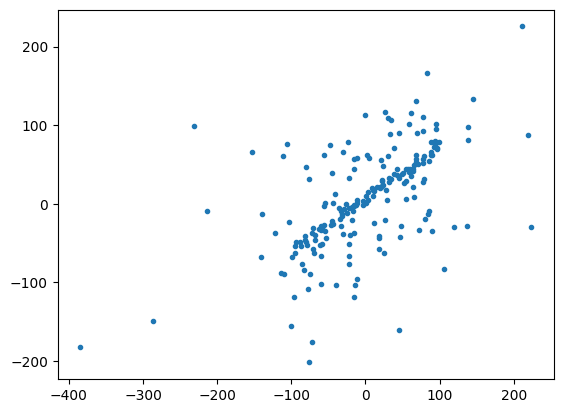

In [194]:
class Data():
# Initializes a line and then adds noise and faulty measurements
    def __init__(self, x_range=(-100,100), slope=0.67, scalar=8):
        self.x = np.arange(x_range[0], x_range[1])
        self.y = slope * x + scalar
        self.data = np.column_stack((self.x,self.y))

    def generate_random_points(self):
        self.add_noise()
        self.add_faulty()
        self.x, self.y = self.data[:,0], self.data[:,1]

    def add_noise(self):
        data_noise = np.random.normal(size=self.data.shape)

        self.data += 4 * data_noise
        self.data[::2] += 45 * data_noise[::2] 
        self.data[::7] += 20 * data_noise[::7] 
        self.data[::11] += 87 * data_noise[::11] 
        self.x, self.y = self.data[:,0], self.data[:,1]

    def add_faulty(self):
        data_faulty = np.random.normal(size=(round(0.25*self.data.shape[0]), 2))
        self.data[::4] += 34 * data_faulty
        self.x, self.y = self.data[:,0], self.data[:,1]
        
data = Data()   
data.generate_random_points()
plt.plot(data.data[:,0], data.data[:,1], '.')

In [195]:
class RansacSolver:

    def __init__(self):
        self.model = LineModelND()

    def fit(self, data: Data, threshold=25, iter_num=1500, sample_num=2):

        counter = 0
        max_inliers = 0
        best = None

        prob_out = 0.5
        prob_desired = 0.95

        while counter < iter_num:

          counter = counter + 1

          np.random.shuffle(data.data)
          sample = data.data[:sample_num, :]

          self.model.estimate(sample)

          y_model = self.model.predict_y(data.x)
          error = np.abs(data.y - y_model.T)
          inliers = np.count_nonzero(error < threshold)

          if inliers > max_inliers:
            max_inliers = inliers
            best = self.model.params


        return best


In [196]:
solver = RansacSolver()
solver.fit(data)

(array([-17.66582001, -13.9041349 ]), array([-0.86675481, -0.49873449]))

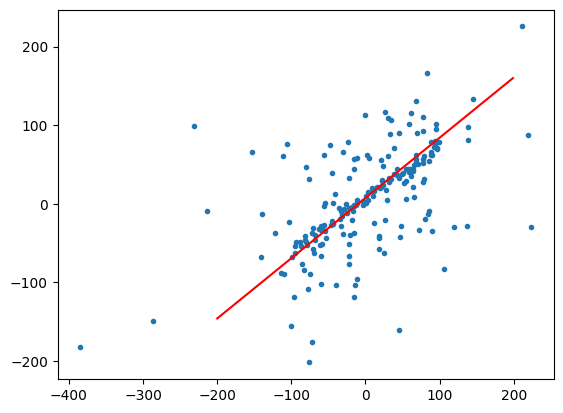

In [197]:
plt.plot(data.data[:,0], data.data[:,1], '.')
plt.plot(x_model, y_model, '-r')